# Problem Set 4: Stimulation of guessing
Let's say, you just read [a nice paper](https://doi.org/10.1016/j.neuropsychologia.2018.07.035). In said paper, the authors are showing subjects images on the screen and later ask subjects to not only remember which images were studied, but where on the screen they were studied (Panel A). They can then have some measure of the precision of memory for the spatial location by measuring the distance between where the object was originally and where they remembered it being (Panel B).

![Paper figure](https://ars.els-cdn.com/content/image/1-s2.0-S0028393218304263-gr1.jpg)

The trouble is knowing what guessing would look like. The authors used a uniform distribution as their model for guessing (Panel C). It's not a bad idea. If you didn't remember even studying the image you'd pick some random location on the screen. The trouble is, you're constrained by the size and shape of the screen for your guess. The experimenters were also constrained by the screen when they originally placed the object.

Your job here is to determine what guessing would look like. What would the distribution of errors (distances between the original and the guessed location) be if you randomly picked a valid original study location and then randomly picked a valid guess. So, pick 1000 (n_trials) random valid "study" locations and for each one, pick 500 (n_subjects) random, valid guessed locations. Figure the distance between these and then plot the histogram of those distances. It's as if you had each subject get the same study phase which had 1000 (n_trials) trials and you're combining the results across subjects (n_subjects * n_trials long)

You may want to lookup and use: `np.hypot()` and `plt.hist()`



In [47]:
import numpy as np
from matplotlib import pyplot as plt


def generate_random_study_locs(n_trials = 1000, n_subjects = 500):
    screen_size=np.array((52,29.5))  #52 cm x 29.5 cm 
    image_size=np.array((4.06,3.25)) 

    valid_original_range = screen_size - image_size 

    #for random valid original study locations can have [0:valid_bound_x, 0:valid_bound_y]
    #boundaries for random valid guesses is screen size so we can have [0:52, 0:29.5]

    rng = np.random.default_rng(314)
    distances = []

    for t in range(n_trials):
        random_valid_locs = rng.random((n_subjects, 2)) * valid_original_range
        random_guesses = rng.random((n_subjects, 2)) * screen_size 

        #get difference between valid random original study locations + random valid guesses 
        delta = random_valid_locs - random_guesses

        #calculate distance between valid random original study locations + random valid guesses 
        dist = np.hypot(delta[:, 0], delta[:, 1])
        distances.extend(dist.flatten()) #flatten array and add to distances list using extend function

    return distances



(array([1.4340e+03, 4.0890e+03, 6.4500e+03, 8.8340e+03, 1.0760e+04,
        1.2823e+04, 1.4337e+04, 1.5571e+04, 1.7017e+04, 1.7878e+04,
        1.9055e+04, 1.9451e+04, 2.0220e+04, 2.0170e+04, 2.0490e+04,
        2.0342e+04, 1.9887e+04, 1.9552e+04, 1.9307e+04, 1.8594e+04,
        1.7405e+04, 1.6680e+04, 1.5626e+04, 1.4531e+04, 1.3523e+04,
        1.2195e+04, 1.1254e+04, 1.0585e+04, 9.8080e+03, 9.0310e+03,
        8.4110e+03, 7.7500e+03, 7.0670e+03, 6.6100e+03, 5.8780e+03,
        5.2890e+03, 4.6500e+03, 3.9830e+03, 3.4530e+03, 2.8240e+03,
        2.2670e+03, 1.7270e+03, 1.3060e+03, 8.8500e+02, 5.5100e+02,
        2.4100e+02, 1.3100e+02, 5.5000e+01, 1.6000e+01, 7.0000e+00]),
 array([3.70684834e-02, 1.18937067e+00, 2.34167286e+00, 3.49397505e+00,
        4.64627724e+00, 5.79857943e+00, 6.95088162e+00, 8.10318381e+00,
        9.25548600e+00, 1.04077882e+01, 1.15600904e+01, 1.27123926e+01,
        1.38646948e+01, 1.50169969e+01, 1.61692991e+01, 1.73216013e+01,
        1.84739035e+01, 1.9626

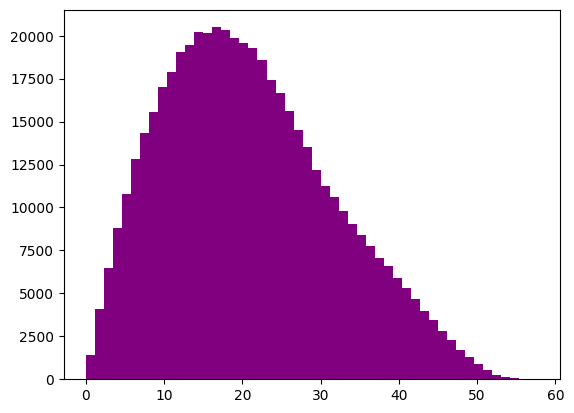

In [ ]:
diff_list = generate_random_study_locs()

plt.hist(diff_list, bins = 50, color = 'purple')